COMENZAMOS CON LA LIMPIEZA DE LOS DATOS


In [2]:
#Importamos las librerias necesarias
import pandas as pd 
import numpy as np

In [3]:
data = pd.read_csv('./dataset/AccidentesAviones.csv')

In [4]:
data.sample(5)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
1158,1158,"January 24, 1950",?,"Near Tamatave, Madagascar",Societe Transatlantique Aerienne,?,Antananarivo - Tamatave,Douglas C-47A-50-DL,F-BFGD,10046,14,11,3,14,11,3,0,Crashed into a mountain 30 miles west of Tamat...
3886,3886,"April 14, 1994",0925,Northern Iraq,Military - U.S. Army / Military U.S. Army,?,?,Sikorsky UH-60 / Sikorsky UH-60,8726000/8826060,?,26,?,?,26,?,?,0,Shot down by friendly fire during the Gulf War...
1497,1497,"January 01, 1955",?,"Near Anchorage, Alaska",Military - US Air Force,?,Anchorage - Nome,Douglas C47,?,?,12,?,?,12,?,?,0,The pilot turned back to make an emergency lan...
2101,2101,"May 08, 1964",2020,"Near Lima, Peru",Fuerza Aérea Argentina,?,Buenos Aires - Lima,Douglas C-54,T-47,3082,49,42,7,46,40,6,0,Crashed into a sand dune while attempting to l...
3774,3774,"July 24, 1992",?,"Near Skopje, Macedonia",Volga-Dnepr Airlines,?,?,Antonov 12BK,CCCP-11342,00347607,8,2,6,8,2,6,0,"On approach, the cargo plane went off course w..."


In [5]:
data.columns

Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

In [6]:
#Renombramos las columnas para entenderlas mejor 
data = data.rename(columns={'fecha' : 'date', 'HORA declarada' : 'time', 'Ruta' : 'location', 'OperadOR' : 'operator', 'flight_no' : 'flight', 'ac_type' : 'type', 'cn_ln' : 'cn/ln', 'PASAJEROS A BORDO' : 'passengers_aboard', 'cantidad de fallecidos' : 'total_fatalities',  })

In [7]:
#Cargamos la tabala con el significado de cada columna
data_description = pd.read_excel('./dataset/descripcion_variables.xlsx')

In [8]:
data_description

,Variable,Significado
0,date,Fecha del accidente formato mes dia año
1,time,Hora local en 24hs. En el formato hh:mm
2,location,Lugar del accidente
3,operator,Aerolinea u operador de la aeronave
4,flight,Numero de vuelo asignado por el operador de ae...
5,route,Ruta completa o parcial volada antes del accid...
6,type,Tipo de aeronave
7,registration,Registro OACI de la aeronave
8,cn/In,Construccion o numero de serie/ numero de line...
9,all_aboard,Total de personas a bordo


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            5008 non-null   int64 
 1   date                  5008 non-null   object
 2   time                  5008 non-null   object
 3   location              5008 non-null   object
 4   operator              5008 non-null   object
 5   flight                5008 non-null   object
 6   route                 5008 non-null   object
 7   type                  5008 non-null   object
 8   registration          5008 non-null   object
 9   cn/ln                 5008 non-null   object
 10  all_aboard            5008 non-null   object
 11  passengers_aboard     5008 non-null   object
 12  crew_aboard           5008 non-null   object
 13  total_fatalities      5008 non-null   object
 14  passenger_fatalities  5008 non-null   object
 15  crew_fatalities       5008 non-null   

Observando el datframe podemos afirmar que los valores nulos se encuentran con el signo '?'. Por lo que procedemos a hacer un conteo de estos 

In [10]:
(data == '?').sum()

Unnamed: 0                 0
date                       0
time                    1504
location                   5
operator                  10
flight                  3682
route                    762
type                      13
registration             272
cn/ln                    667
all_aboard                17
passengers_aboard        221
crew_aboard              219
total_fatalities           8
passenger_fatalities     235
crew_fatalities          235
ground                    44
summary                   59
dtype: int64

Procedemos a eliminar las columnas que consideramos irrelevantes ya sea por falta de valor o por no aportar valor a nuestro analisis

In [11]:
columnas_eliminar = ['Unnamed: 0', 'flight', 'cn/ln', 'time', 'registration', 'summary']
data = data.drop(columnas_eliminar, axis = 1)

In [12]:
data.head(2)

,date,location,operator,route,type,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground
0,"September 17, 1908","Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,1,1,1,0,0
1,"September 07, 1909","Juvisy-sur-Orge, France",?,Air show,Wright Byplane,1,0,1,1,0,0,0


In [13]:
#Convertimos la columna date a tipo fecha
data['date'] = pd.to_datetime(data['date'])


In [14]:
#Creamos 3 columnas nuevas, year, month y day y eliminamos la columna date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month_name(locale='es')
data['day'] = data['date'].dt.day_name(locale='es')
data = data.drop('date', axis=1)


In [15]:
data.tail(5)

,location,operator,route,type,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,year,month,day
5003,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,6,5,1,5,4,1,0,2021,Marzo,Domingo
5004,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,Beechcraft B300 King Air 350i,11,7,4,11,7,4,0,2021,Mayo,Viernes
5005,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,14,12,2,12,11,1,0,2021,Junio,Jueves
5006,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,96,88,8,50,?,?,3,2021,Julio,Domingo
5007,"Palana, Russia",Kamchatka Aviation Enterprise,Petropavlovsk - Palana,Antonov An 26B-100,28,22,6,28,22,6,0,2021,Julio,Martes


In [16]:
#Convertimos las columas que correspondan a tipo entero 
data['all_aboard'] = pd.to_numeric(data['all_aboard'], errors='coerce', downcast='integer')
data['passengers_aboard'] = pd.to_numeric(data['passengers_aboard'], errors='coerce', downcast='integer')
data['crew_aboard'] = pd.to_numeric(data['crew_aboard'], errors='coerce', downcast='integer')
data['total_fatalities'] = pd.to_numeric(data['total_fatalities'], errors='coerce', downcast='integer')
data['passenger_fatalities'] = pd.to_numeric(data['passenger_fatalities'], errors='coerce', downcast='integer')
data['crew_fatalities'] = pd.to_numeric(data['crew_fatalities'], errors='coerce', downcast='integer')
data['ground'] = pd.to_numeric(data['ground'], errors='coerce', downcast='integer')

In [17]:
#Separamos location en dos columnas, una que contenga solo el pais 
data['country']  = data['location'].str.split(',').str[-1].str.strip().str.upper()

#Explicacion del codigo 
# Toma la columna location y la separa en una lista por valores utilizando el separador ',' y con el [-1] toma 
# el ultimo valor encontrado, despues con strip elimina los espacios en blanco y con upper convierte todos los 
# valores a mayuscula para cuando hagamos el analisis correspondiente no se cuenten duplicados mal escritos 

In [18]:
data.sample(5)

,location,operator,route,type,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,year,month,day,country
4798,"Cork, Ireland",Manx2,Belfast - Cork,Swearingen SA-227BC Metro III,12.0,10.0,2.0,6.0,4.0,2.0,0.0,2011,Febrero,Jueves,IRELAND
3429,"Kansas City, Kansas",Burlington Air Express,Wichita - Kansas City,Boeing 707-351C,4.0,1.0,3.0,4.0,1.0,3.0,0.0,1987,Abril,Lunes,KANSAS
4957,"Abidjan, Ivory Coast",Valan International Cargo Charter,Burkina Faso - Abidjan,Antonov AN-26-100,10.0,4.0,6.0,4.0,4.0,0.0,0.0,2017,Octubre,Sábado,IVORY COAST
3270,"JFK Airport, New York, New York",Scandinavian Airlines (SAS),"Oslo, Norway, New York, NY",McDonnell Douglas DC-10-30,177.0,163.0,14.0,0.0,0.0,0.0,0.0,1984,Febrero,Martes,NEW YORK
772,"Near Montieri, Italy",Military - U.S. Army Air Forces,Florence - Rome,Douglas C-47-DL,26.0,22.0,4.0,23.0,21.0,2.0,0.0,1945,Febrero,Viernes,ITALY


In [19]:
data.describe()

,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,year
count,4991.000000,4787.000000,4789.000000,5000.000000,4773.000000,4773.000000,4964.000000,5008.000000
mean,31.121218,26.877376,4.519524,22.294000,18.940708,3.587262,1.718372,1970.851637
std,45.479965,44.035342,3.758072,35.000385,34.065190,3.177315,55.495544,24.703696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1908.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,1951.000000
50%,16.000000,12.000000,4.000000,11.000000,7.000000,3.000000,0.000000,1970.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000,1992.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000,2021.000000


Analizamos por que el valor minimo de total de pasajeros a bordo es igual a cero

In [20]:
data[data['all_aboard'] == 0]

,location,operator,route,type,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,year,month,day,country
30,"English Channel off Forkstone, Kent",Aircraft Transport and Travel,?,De Havilland DH-4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1919,Octubre,Lunes,KENT
120,"Estaires, France",Fokker,Delivery flight,Fokker F-VII,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1927,Enero,Miércoles,FRANCE
1121,"Jamnagar, Gujarat state, India",Indian Air Force,Training,Hawker Hunter,0.0,1.0,1.0,0.0,1.0,1.0,14.0,1949,Julio,Miércoles,INDIA
3144,"Near Babaeski, Turkey",Military - Turkish Air Force,?,Northrop F-5A,0.0,0.0,0.0,0.0,0.0,0.0,40.0,1981,Septiembre,Martes,TURKEY
3376,"Bangui, Central African Republic",Military - French Air Force,?,Sepecat Jaguar A,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1986,Marzo,Jueves,CENTRAL AFRICAN REPUBLIC


In [21]:
#Corregimos este error
mask = data['all_aboard'] == 0
suma = data['passengers_aboard'] + data['crew_aboard']
#Reemplazamos solo las filas donde encontramos este error 
data.loc[mask, 'all_aboard'] = suma[mask]

In [22]:
#Analizamos nuevamente
data.describe()

,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,year
count,4991.000000,4787.000000,4789.000000,5000.000000,4773.000000,4773.000000,4964.000000,5008.000000
mean,31.122220,26.877376,4.519524,22.294000,18.940708,3.587262,1.718372,1970.851637
std,45.479299,44.035342,3.758072,35.000385,34.065190,3.177315,55.495544,24.703696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1908.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,1951.000000
50%,16.000000,12.000000,4.000000,11.000000,7.000000,3.000000,0.000000,1970.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000,1992.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000,2021.000000


In [23]:
data[data['all_aboard'] == 0]

,location,operator,route,type,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,year,month,day,country
3144,"Near Babaeski, Turkey",Military - Turkish Air Force,?,Northrop F-5A,0.0,0.0,0.0,0.0,0.0,0.0,40.0,1981,Septiembre,Martes,TURKEY
3376,"Bangui, Central African Republic",Military - French Air Force,?,Sepecat Jaguar A,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1986,Marzo,Jueves,CENTRAL AFRICAN REPUBLIC


Deberiamos consultar a expertos a que se deben estos valores en cero

In [24]:
#Reemplazamos los valores '?' por NaN 
data['route'].replace('?', np.nan, inplace=True)

In [25]:
#Se lo aplicamos al resto de las columnas
columnas_reemplazo = ['location', 'operator', 'type']
data[columnas_reemplazo] = data[columnas_reemplazo].replace('?', np.nan)

Convertimos todos los estados de los Estados Unidos en EEUU para poder hacer un analisis enfocado en paises 

In [26]:
estados = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
    'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
    'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
    'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

estados_eeuu = [estado.upper() for estado in estados]
data['country'] = data['country'].replace(estados_eeuu, 'EEUU')


In [27]:
#Analizamos cuantos datos existen con fecha anterior a 1930 para eliminarlos por ser muy viejos y no tener influencia 
count = data[data['year'] < 1930].shape[0]
count

215

In [28]:
data = data[data['year'] >= 1930]
data.describe()

,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,year
count,4778.000000,4597.000000,4598.000000,4786.000000,4581.000000,4581.000000,4750.000000,4793.000000
mean,32.242570,27.909071,4.610048,23.068533,19.673434,3.661428,1.792421,1972.945546
std,46.129497,44.633338,3.630887,35.543940,34.576481,3.126373,56.730788,23.120993
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1930.000000
25%,7.000000,4.000000,2.000000,4.000000,1.000000,2.000000,0.000000,1953.000000
50%,17.000000,13.000000,4.000000,12.000000,8.000000,3.000000,0.000000,1972.000000
75%,36.000000,32.000000,6.000000,26.000000,22.000000,5.000000,0.000000,1992.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,33.000000,2750.000000,2021.000000


Agregamos una columna con la decada que corresponde a cada año para facilitar analisis 

In [29]:
data['decade'] = (data['year'] // 10) * 10

Agreamos una columna que nos dice si el vuelo fue con escala o sin escala (vuelo directo)

In [30]:
def check_escala(route):
    try:
        if len(route.split('-')) > 2:
            return 'Con escala'
        else:
            return 'Sin escala'
    except:
        return 'Sin dato'

data['scale'] = data['route'].apply(check_escala)

Exportamos el dataset limpio 

In [31]:
data.to_csv("C:/Users/marti/Desktop/PI - Analytics/dataset/AccidentesAvionesClean.csv", index=False)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
accidentes_decada = data.groupby('decade')['year'].count()

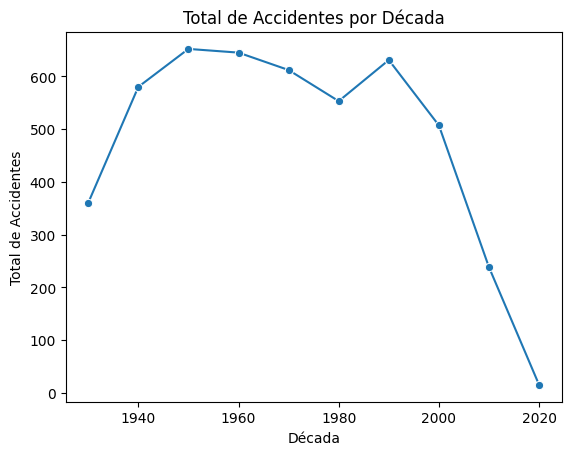

In [34]:
sns.lineplot(x=accidentes_decada.index, y=accidentes_decada.values, marker='o')
plt.xlabel('Década')
plt.ylabel('Total de Accidentes')
plt.title('Total de Accidentes por Década')
plt.show()

En este grafico podemos notar que en la decada de 1950 fue en la que mayor cantidad de accidentes hubo, su numero redujo hasta 1980 pero luego aumento nuevamente en la siguiente decada. Observamos tambien un descenso bastante significativo, en comparacion a los años anteriores, a partir del año 2000 hasta la actualidad

In [35]:
accidentes_dia = data['day'].value_counts()

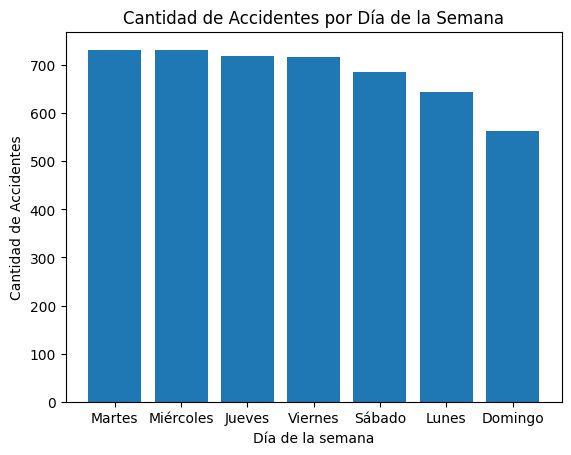

In [36]:
plt.bar(accidentes_dia.index, accidentes_dia.values)
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes por Día de la Semana')
plt.show()

In [37]:
accidentes_dia

Martes       732
Miércoles    731
Jueves       719
Viernes      716
Sábado       686
Lunes        645
Domingo      564
Name: day, dtype: int64

Podemos notar que no hay una gran diferencia en la cantidad de accidentes distribuidos por dia de la semana, en los unicos podemos notar una diferencia superior a 100 accidentes con respecto a los demas es en los dias Lunes y Domingo

In [38]:
accidentes_pais = data['country'].value_counts().head(20)

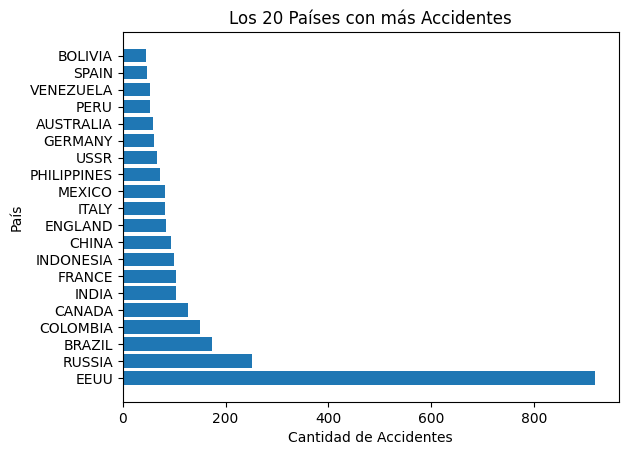

In [39]:
plt.barh(accidentes_pais.index, accidentes_pais.values)
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('País')
plt.title('Los 20 Países con más Accidentes')
plt.show()

In [40]:
accidentes_pais

EEUU           918
RUSSIA         252
BRAZIL         173
COLOMBIA       150
CANADA         127
INDIA          104
FRANCE         103
INDONESIA       99
CHINA           93
ENGLAND         85
ITALY           83
MEXICO          82
PHILIPPINES     72
USSR            66
GERMANY         60
AUSTRALIA       59
PERU            54
VENEZUELA       54
SPAIN           47
BOLIVIA         46
Name: country, dtype: int64

Podemos visualizar una notable diferencia en la cantidad de accidentes ocurridos en EEUU con respecto a los demas paises, habria que analizar estudiando las causas de estos accidentes por que se mantiene esta tendencia en el pais mencionado

In [41]:
tipos_aeronaves = data['type'].value_counts().head(20)

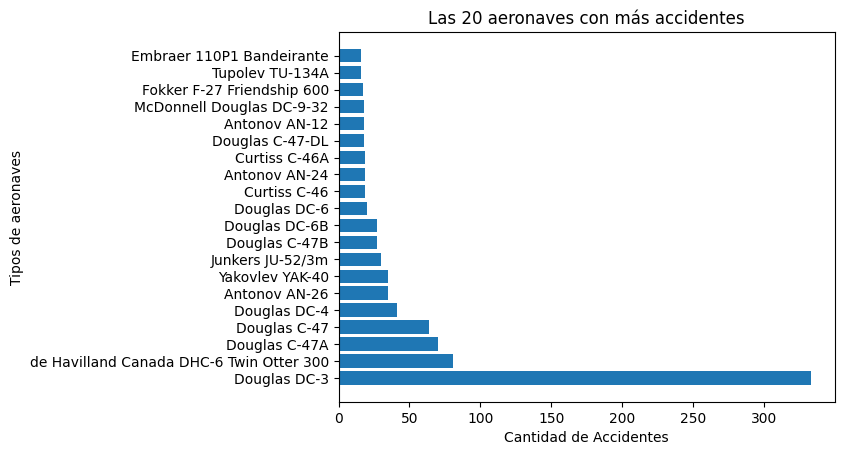

In [42]:
plt.barh(tipos_aeronaves.index, tipos_aeronaves.values)
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Tipos de aeronaves')
plt.title('Las 20 aeronaves con más accidentes')
plt.show()

Realizamos el mismo grafico pero con los operadores 

In [43]:
tipos_operadores = data['operator'].value_counts().head(20)

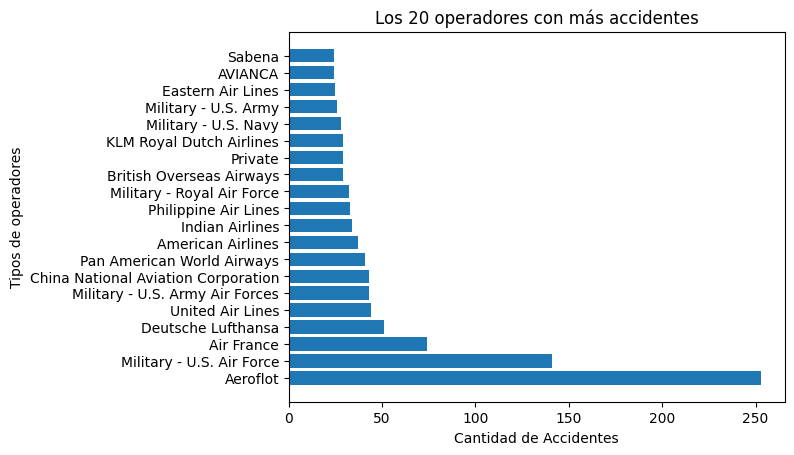

In [44]:
plt.barh(tipos_operadores.index, tipos_operadores.values)
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Tipos de operadores')
plt.title('Los 20 operadores con más accidentes')
plt.show()

Podemos notar una gran cantidad de accidentes aereos en donde los operadores de las aeronaves pertenecen a un grupo militar, lo cual podemos respaldar con el grafico anterior, la mayoria de los nombres de las aeronaves que figuran en el grafico pertenecen a transportes militares